In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
N, D, H= 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))
h= tf.maximum(tf.matmul(x,w1), 0)
y_pred = tf.matmul(h, w2)
diff =y_pred-y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
grad_w1, grad_w2 = tf.gradients(loss ,[w1, w2])
learning_rate = 1e-5
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)
updates = tf.group(new_w1,new_w2)

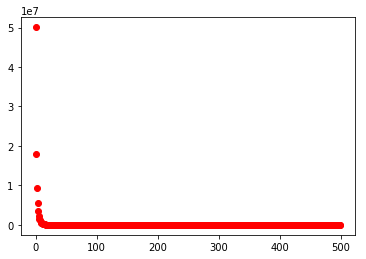

50076350.0 970.47876


In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D), y: np.random.randn(N , D),}
    loss_summery=[]
    steps=500
    for t in range(steps):
        out = sess.run([loss, updates],feed_dict=values)
        loss_val, _ = out
        loss_summery.append(loss_val)
    plt.plot(range(steps), loss_summery, 'ro',label='loss_value')
    plt.show()
    print(loss_summery[0],loss_summery[steps-1])